Danny Hong 
ECE-411 Problem Set 1: Portfolios

For this assignment, two groups of five stocks from two different sectors were used. The two sectors were the Tech Sector and the Bank Sector. Below are the stocks from each sector:

Tech Sector Stocks: TWTR, AAPL, MSFT, AMZN, GOOG

Bank Sector Stocks: JPM, BAC, WFC, MS, GS



In [61]:
!pip install yfinance
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from numpy import random
import math
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Data Acquisition and Pre-Processing

In [62]:
start = datetime(year = 2017, month = 12, day = 31)
end = datetime(year = 2019, month = 1, day = 1)

tech_stocks = ['TWTR', 'AAPL', 'MSFT', 'AMZN', 'GOOG']
bank_stocks = ['JPM', 'BAC', 'WFC', 'MS', 'GS']
combined_stocks = tech_stocks + bank_stocks
SP500 = '^GSPC'

tech_stock_returns = []
bank_stock_returns = []

for i in range(len(tech_stocks)):
  print(tech_stocks[i])
  tech_stock_price = yf.download(tech_stocks[i], start, end)['Adj Close']
  tech_stock_returns.append(tech_stock_price.pct_change().dropna().to_frame('Daily Returns'))
    
for j in range(len(bank_stocks)):
  print(bank_stocks[j])
  bank_stock_price = yf.download(bank_stocks[j], start, end)['Adj Close']
  bank_stock_returns.append(bank_stock_price.pct_change().dropna().to_frame('Daily Returns'))

print(SP500)
SP500_stock_price = yf.download(SP500, start, end)['Adj Close']
SP500_stock_return = (SP500_stock_price.pct_change().dropna().to_frame('Daily Returns'))

TWTR
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
MSFT
[*********************100%***********************]  1 of 1 completed
AMZN
[*********************100%***********************]  1 of 1 completed
GOOG
[*********************100%***********************]  1 of 1 completed
JPM
[*********************100%***********************]  1 of 1 completed
BAC
[*********************100%***********************]  1 of 1 completed
WFC
[*********************100%***********************]  1 of 1 completed
MS
[*********************100%***********************]  1 of 1 completed
GS
[*********************100%***********************]  1 of 1 completed
^GSPC
[*********************100%***********************]  1 of 1 completed


In [63]:
fed_data = web.DataReader(['TB3SMFFM', 'FEDFUNDS'], 'fred', start, end)
fed_data['3MO T-BILL'] = fed_data['TB3SMFFM'] + fed_data['FEDFUNDS']
fed_3mo_daily = (fed_data['3MO T-BILL'].resample(rule = 'B').ffill().to_frame())/(100 * 252)
display(fed_3mo_daily)

,3MO T-BILL
DATE,
2018-01-01,0.000056
2018-01-02,0.000056
2018-01-03,0.000056
2018-01-04,0.000056
2018-01-05,0.000056
...,...
2018-12-26,0.000094
2018-12-27,0.000094
2018-12-28,0.000094


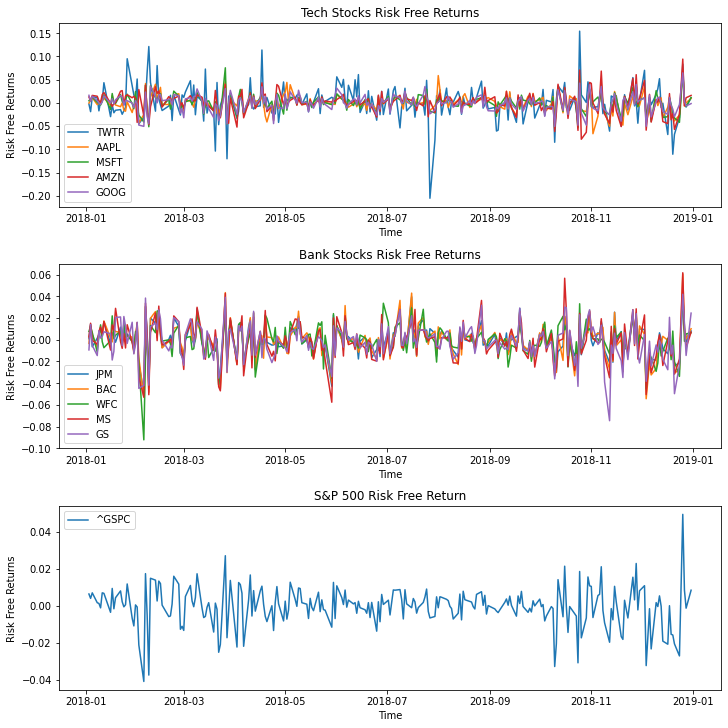

In [64]:
def subtract(stock, risk_free, name):
  stock = stock.tz_localize(None) 
  merged = risk_free.join(stock)
  subtracted = merged[name] - merged['3MO T-BILL']
  subtracted = subtracted.dropna()
  return subtracted

tech_expected_returns = []
bank_expected_returns = []
for k in range(len(tech_stock_returns)):
  tech_expected_returns.append(subtract(tech_stock_returns[k], fed_3mo_daily, 'Daily Returns'))
  bank_expected_returns.append(subtract(bank_stock_returns[k], fed_3mo_daily, 'Daily Returns'))
    
SP500_expected_returns = subtract(SP500_stock_return, fed_3mo_daily, 'Daily Returns')

fig, ax = plt.subplots(3, 1, constrained_layout = True, figsize = (10, 10))

for m in range(len(tech_expected_returns)):
  ax[0].plot(tech_expected_returns[m], label = tech_stocks[m])
  ax[1].plot(bank_expected_returns[m], label = bank_stocks[m])  

ax[2].plot(SP500_expected_returns, label = SP500)

ax[0].set_title("Tech Stocks Risk Free Returns")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Risk Free Returns")
ax[0].legend()

ax[1].set_title("Bank Stocks Risk Free Returns")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Risk Free Returns")
ax[1].legend()

ax[2].set_title("S&P 500 Risk Free Return")
ax[2].set_xlabel("Time")
ax[2].set_ylabel("Risk Free Returns")
ax[2].legend()

fig.show()

Data Analysis

In [65]:
#1a.)

SP500_sigma = SP500_expected_returns.std()
SP500_mu = SP500_expected_returns.mean()

print("S&P500 (σ, µ) point: (" + str(SP500_sigma) + ", " + str(SP500_mu) + ")")

tech_expected_returns_df = pd.DataFrame(tech_expected_returns).T
tech_expected_returns_df.columns = tech_stocks

bank_expected_returns_df = pd.DataFrame(bank_expected_returns).T
bank_expected_returns_df.columns = bank_stocks

SP500_expected_returns_df = pd.DataFrame(SP500_expected_returns)
SP500_expected_returns_df = SP500_expected_returns_df.rename(columns = {0: SP500})

all_expected_returns_df = tech_expected_returns_df.join(bank_expected_returns_df)
all_expected_returns_df = all_expected_returns_df.join(SP500_expected_returns_df)

# Calculate and display the three covariance matrices
all_covariance_matrix = all_expected_returns_df.cov()
print("\n Covariance Matrix for the full set of stocks:")
display(all_covariance_matrix)

print("\n Covariance Matrix for the tech stocks:")
tech_covariance_matrix = all_expected_returns_df[tech_stocks].cov()
display(tech_covariance_matrix)

print("\n Covariance Matrix for the bank stocks:")
bank_covariance_matrix = all_expected_returns_df[bank_stocks].cov()
display(bank_covariance_matrix)

S&P500 (σ, µ) point: (0.010750324291946528, -0.00030996688341357375)

 Covariance Matrix for the full set of stocks:


,TWTR,AAPL,MSFT,AMZN,GOOG,JPM,BAC,WFC,MS,GS,^GSPC
TWTR,0.001325,0.000258,0.000306,0.000333,0.000311,0.000118,0.000126,0.000114,0.000172,0.000181,0.000163
AAPL,0.000258,0.000328,0.000226,0.000272,0.000219,0.000130,0.000147,0.000111,0.000174,0.000166,0.000145
MSFT,0.000306,0.000226,0.000318,0.000315,0.000261,0.000152,0.000173,0.000133,0.000195,0.000189,0.000167
AMZN,0.000333,0.000272,0.000315,0.000518,0.000303,0.000161,0.000191,0.000135,0.000221,0.000208,0.000188
GOOG,0.000311,0.000219,0.000261,0.000303,0.000314,0.000148,0.000166,0.000135,0.000196,0.000186,0.000158
JPM,0.000118,0.000130,0.000152,0.000161,0.000148,0.000195,0.000202,0.000162,0.000212,0.000181,0.000115
BAC,0.000126,0.000147,0.000173,0.000191,0.000166,0.000202,0.000242,0.000177,0.000234,0.000201,0.000126
WFC,0.000114,0.000111,0.000133,0.000135,0.000135,0.000162,0.000177,0.000219,0.000179,0.000153,0.000104
MS,0.000172,0.000174,0.000195,0.000221,0.000196,0.000212,0.000234,0.000179,0.000297,0.000237,0.000146
GS,0.000181,0.000166,0.000189,0.000208,0.000186,0.000181,0.000201,0.000153,0.000237,0.000262,0.000134



 Covariance Matrix for the tech stocks:


,TWTR,AAPL,MSFT,AMZN,GOOG
TWTR,0.001325,0.000258,0.000306,0.000333,0.000311
AAPL,0.000258,0.000328,0.000226,0.000272,0.000219
MSFT,0.000306,0.000226,0.000318,0.000315,0.000261
AMZN,0.000333,0.000272,0.000315,0.000518,0.000303
GOOG,0.000311,0.000219,0.000261,0.000303,0.000314



 Covariance Matrix for the bank stocks:


,JPM,BAC,WFC,MS,GS
JPM,0.000195,0.000202,0.000162,0.000212,0.000181
BAC,0.000202,0.000242,0.000177,0.000234,0.000201
WFC,0.000162,0.000177,0.000219,0.000179,0.000153
MS,0.000212,0.000234,0.000179,0.000297,0.000237
GS,0.000181,0.000201,0.000153,0.000237,0.000262


In [66]:
#1b.)

all_condition_number = np.linalg.cond(all_covariance_matrix)
tech_condition_number = np.linalg.cond(tech_covariance_matrix)
bank_condition_number = np.linalg.cond(bank_covariance_matrix)

print("Covariance Condition Number for all stocks: ", all_condition_number)
print("Covariance Condition Number for tech stocks: ", tech_condition_number)
print("Covariance Condition Number for bank stocks: ", bank_condition_number)

print("""\nThe covariance of each stock is positive, which indicates that there is a positive correlation between the market and the stocks. 
In other words, as the market goes up, the stocks go up as well. In addition, these stocks are all positively correlated with one 
another, indicating that in general, when the stock's respective sector goes up, the individual stock goes up as well. Lastly, the 
covariance condition number for all the stocks altogether is relatively high, while the covariance condition number for each sector 
is relatively low. This indicates that each sector individually is more stable than combining all the stocks into one group.""")

Covariance Condition Number for all stocks:  230.10608801553118
Covariance Condition Number for tech stocks:  33.92731323310662
Covariance Condition Number for bank stocks:  72.94673927482926

The covariance of each stock is positive, which indicates that there is a positive correlation between the market and the stocks. 
In other words, as the market goes up, the stocks go up as well. In addition, these stocks are all positively correlated with one 
another, indicating that in general, when the stock's respective sector goes up, the individual stock goes up as well. Lastly, the 
covariance condition number for all the stocks altogether is relatively high, while the covariance condition number for each sector 
is relatively low. This indicates that each sector individually is more stable than combining all the stocks into one group.


In [67]:
#1c.)

single_factor_returns_residuals_df = pd.DataFrame()

for stock in combined_stocks:
  beta = all_expected_returns_df[stock].cov(all_expected_returns_df[SP500]) / all_expected_returns_df[SP500].var()
  alpha = all_expected_returns_df[stock].mean() - (beta * all_expected_returns_df[SP500].mean())
  single_factor_returns_residuals_df[stock] = all_expected_returns_df[stock] - (alpha + (beta * all_expected_returns_df[SP500]))

residuals_correlation_matrix = single_factor_returns_residuals_df.cov().round(6)
print("Correlation Matrix of the Residuals from the Single Factor Return model: ")
display(residuals_correlation_matrix)

print("""\nThe correlations within each sector are positive for both the tech stocks and the bank stocks whereas the correlations between 
the two sectors are negative. In addition, there are also slightly stronger correlations in magnitude within each sector as opposed to 
between them since the magnitudes of the covariance values for within each sector is relatively larger than the magnitudes of the covariance 
values between each sector.""")

Correlation Matrix of the Residuals from the Single Factor Return model: 


,TWTR,AAPL,MSFT,AMZN,GOOG,JPM,BAC,WFC,MS,GS
TWTR,0.001095,0.000054,0.000070,0.000068,0.000088,-0.000044,-0.000053,-0.000033,-0.000034,-0.000007
AAPL,0.000054,0.000146,0.000015,0.000037,0.000020,-0.000014,-0.000012,-0.000020,-0.000009,-0.000002
MSFT,0.000070,0.000015,0.000075,0.000043,0.000031,-0.000015,-0.000010,-0.000019,-0.000016,-0.000005
AMZN,0.000068,0.000037,0.000043,0.000214,0.000046,-0.000025,-0.000015,-0.000034,-0.000015,-0.000009
GOOG,0.000088,0.000020,0.000031,0.000046,0.000097,-0.000010,-0.000007,-0.000008,-0.000003,0.000003
JPM,-0.000044,-0.000014,-0.000015,-0.000025,-0.000010,0.000080,0.000076,0.000058,0.000067,0.000048
BAC,-0.000053,-0.000012,-0.000010,-0.000015,-0.000007,0.000076,0.000104,0.000063,0.000075,0.000055
WFC,-0.000033,-0.000020,-0.000019,-0.000034,-0.000008,0.000058,0.000063,0.000124,0.000048,0.000032
MS,-0.000034,-0.000009,-0.000016,-0.000015,-0.000003,0.000067,0.000075,0.000048,0.000113,0.000068
GS,-0.000007,-0.000002,-0.000005,-0.000009,0.000003,0.000048,0.000055,0.000032,0.000068,0.000107



The correlations within each sector are positive for both the tech stocks and the bank stocks whereas the correlations between 
the two sectors are negative. In addition, there are also slightly stronger correlations in magnitude within each sector as opposed to 
between them since the magnitudes of the covariance values for within each sector is relatively larger than the magnitudes of the covariance 
values between each sector.


All Stocks MVP(σ, µ) = (0.012398273404307422, -0.00034311172206878237)
All Stocks MP(σ, µ) = (0.09950899528238524, -0.022102317840008184)


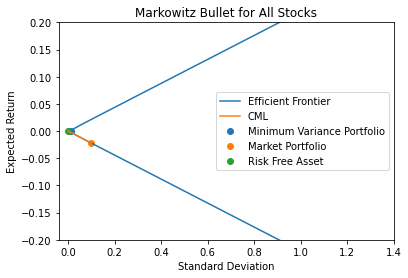



Tech Stocks MVP(σ, µ) = (0.01601722283100354, -2.4276061583641726e-05)
Tech Stocks MP(σ, µ) = (1.1997350727853644, -0.1361991840337472)


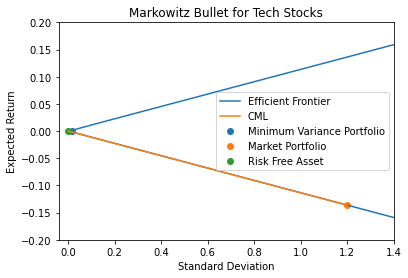



Bank Stocks MVP(σ, µ) = (0.01299037632868051, -0.0006032657972412679)
Bank Stocks MP(σ, µ) = (0.04432635306355795, -0.007024076624159208)


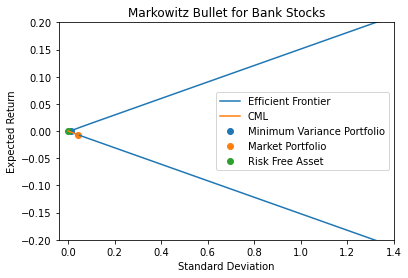

In [68]:
#1d.)

def get_MVP_and_MP(stocks, sector):
  ones = np.ones(len(stocks))
  mean = all_expected_returns_df[stocks].mean()
  cov = all_expected_returns_df[stocks].cov()
  cov_inv = np.linalg.inv(cov)

  sigma_MVP = 1/(np.sqrt(ones.T @ cov_inv @ ones))
  mu_MVP = (ones.T @ cov_inv @ mean)/(ones.T @ cov_inv @ ones)

  w_MP_s = 1/(ones @ cov_inv @ mean)
  w_MP = w_MP_s * cov_inv @ mean

  mu_MP = w_MP @ mean
  sigma_MP = np.sqrt(w_MP @ cov @ w_MP)

  print(sector + " MVP(σ, µ) = (" + str(sigma_MVP) + ", " + str(mu_MVP) + ")")
  print(sector + " MP(σ, µ) = (" + str(sigma_MP) + ", " + str(mu_MP) + ")")

  sigma_ef = []
  mu_ef = np.linspace(-0.5, 0.5, 2000)
  mu = all_expected_returns_df[stocks].mean()

  for i in mu_ef:
    mu_t = np.array([i, 1])
    m_t = np.concatenate((mu.values.reshape((len(stocks), 1)), np.ones((len(stocks), 1))), axis = 1)
    B = m_t.T @ cov_inv @ m_t
    B_inv = np.linalg.inv(B)
    sigma_v = np.sqrt(mu_t.T @ B_inv @ m_t.T @ cov_inv @ m_t @ B_inv @ mu_t)
    sigma_ef.append(sigma_v)

  risk_free_rate = fed_3mo_daily['3MO T-BILL'].iloc[1:].mean()

  plt.figure()
  plt.plot(sigma_ef, mu_ef, label = "Efficient Frontier")
  plt.plot([0, sigma_MP], [risk_free_rate, mu_MP], label = "CML")
  plt.scatter(sigma_MVP, mu_MVP, label = "Minimum Variance Portfolio")
  plt.scatter(sigma_MP, mu_MP, label = "Market Portfolio")
  plt.scatter(0, risk_free_rate, label = "Risk Free Asset")
  plt.legend()
  plt.axis([-0.04, 1.4, -0.2, 0.2])
  plt.title("Markowitz Bullet for " + sector)
  plt.xlabel("Standard Deviation")
  plt.ylabel("Expected Return") 
  plt.show()

  return mu_MP

all_mu_MP = get_MVP_and_MP(combined_stocks, "All Stocks")
print("\n")
tech_mu_MP = get_MVP_and_MP(tech_stocks, "Tech Stocks")
print("\n")
bank_mu_MP = get_MVP_and_MP(bank_stocks, "Bank Stocks")

In [73]:
#1e.)

print("""Looking at the Market Portfolio weights of all the graphs, there is significant short selling in all three cases. 
Viewing the graphs subjectively though, both the Market Portfolio weights for the All Stocks Plot and the Tech Stocks plot are
considerably farther than the S&P500, whereas the Bank Stocks Market Portfolio weight is somewhat close to the S&P 500 relatively speaking.""")

Looking at the Market Portfolio weights of all the graphs, there is significant short selling in all three cases. 
Viewing the graphs subjectively though, both the Market Portfolio weights for the All Stocks Plot and the Tech Stocks plot are
considerably farther than the S&P500, whereas the Bank Stocks Market Portfolio weight is somewhat close to the S&P 500 relatively speaking.


In [70]:
#1f.)

all_betas = pd.DataFrame()
tech_betas = pd.DataFrame()
bank_betas = pd.DataFrame()

for stock in combined_stocks:
  all_betas[stock] = [all_expected_returns_df[stock].mean()/all_mu_MP]

for tech_stock in tech_stocks:
  tech_betas[tech_stock] = [all_expected_returns_df[tech_stock].mean()/tech_mu_MP]

for bank_stock in bank_stocks:
  bank_betas[bank_stock] = [all_expected_returns_df[bank_stock].mean()/bank_mu_MP]

print("All stocks β values:")
display(all_betas)
print("\nTech stocks β values:")
display(tech_betas)
print("\nBank stocks β values:")
display(bank_betas)

All stocks β values:


,TWTR,AAPL,MSFT,AMZN,GOOG,JPM,BAC,WFC,MS,GS
0,-0.055648,0.009328,-0.037012,-0.050522,0.00144,0.013194,0.029726,0.044297,0.042526,0.072023



Tech stocks β values:


,TWTR,AAPL,MSFT,AMZN,GOOG
0,-0.009031,0.001514,-0.006006,-0.008199,0.000234



Bank stocks β values:


,JPM,BAC,WFC,MS,GS
0,0.041516,0.093537,0.139386,0.133813,0.22663


Expected Daily Returns for All Stocks for January:


,TWTR,AAPL,MSFT,AMZN,GOOG,JPM,BAC,WFC,MS,GS
DATE,,,,,,,,,,
2018-01-03,-0.002504,-0.000230,0.004598,0.012719,0.016357,0.000963,-0.003401,0.007638,0.002626,-0.009365
2018-01-04,-0.018870,0.004589,0.008746,0.004420,0.003565,0.014270,0.013031,0.012452,0.015232,0.013920
2018-01-05,0.013700,0.011329,0.012342,0.016107,0.014515,-0.006476,0.004581,0.006682,-0.000432,-0.005156
2018-01-08,0.011046,-0.003770,0.000965,0.014369,0.004217,0.001421,-0.006980,-0.011371,-0.004199,-0.014575
2018-01-09,-0.017136,-0.000171,-0.000736,0.004620,-0.000670,0.005013,0.004924,0.003490,0.007696,0.008403
2018-01-10,0.003254,-0.000286,-0.004590,0.001245,-0.003355,0.010948,0.009194,0.013757,0.011764,0.001480
2018-01-11,0.004068,0.005624,0.002905,0.017762,0.002583,0.005295,0.003545,-0.001799,0.004950,0.003090
2018-01-12,0.043476,0.010270,0.017201,0.022283,0.015086,0.016454,0.017230,-0.007356,0.016918,0.007391
2018-01-16,-0.029572,-0.005138,-0.014007,-0.000317,-0.000501,-0.003606,0.001547,-0.000855,-0.009490,0.005508




β values for All Stocks for the month of January:


,TWTR,AAPL,MSFT,AMZN,GOOG,JPM,BAC,WFC,MS,GS
0,0.334689,0.265665,0.377942,0.108919,0.265926,0.140865,0.108043,0.142314,0.24963,-0.016745




Average Daily Returns for All Stocks and S&P500 for February:


,TWTR,AAPL,MSFT,AMZN,GOOG,JPM,BAC,WFC,MS,GS,^GSPC
0,0.011956,0.003662,-0.000231,0.002401,-0.002766,0.000076,0.000338,-0.005642,-0.000275,-0.000627,-0.00201


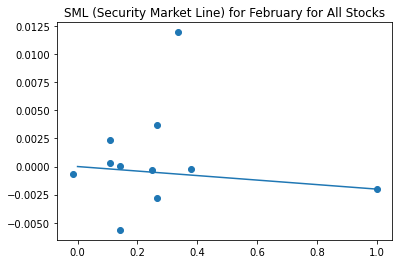



Expected Daily Returns for Tech Stocks for January:


,TWTR,AAPL,MSFT,AMZN,GOOG
DATE,,,,,
2018-01-03,-0.002504,-0.000230,0.004598,0.012719,0.016357
2018-01-04,-0.018870,0.004589,0.008746,0.004420,0.003565
2018-01-05,0.013700,0.011329,0.012342,0.016107,0.014515
2018-01-08,0.011046,-0.003770,0.000965,0.014369,0.004217
2018-01-09,-0.017136,-0.000171,-0.000736,0.004620,-0.000670
2018-01-10,0.003254,-0.000286,-0.004590,0.001245,-0.003355
2018-01-11,0.004068,0.005624,0.002905,0.017762,0.002583
2018-01-12,0.043476,0.010270,0.017201,0.022283,0.015086
2018-01-16,-0.029572,-0.005138,-0.014007,-0.000317,-0.000501




β values for Tech Stocks for the month of January:


,TWTR,AAPL,MSFT,AMZN,GOOG
0,0.334689,0.265665,0.377942,0.108919,0.265926




Average Daily Returns for Tech Stocks and S&P500 for February:


,TWTR,AAPL,MSFT,AMZN,GOOG,^GSPC
0,0.011956,0.003662,-0.000231,0.002401,-0.002766,-0.00201


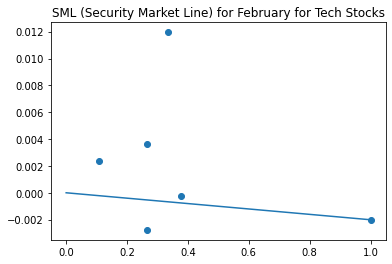



Expected Daily Returns for Bank Stocks for January:


,JPM,BAC,WFC,MS,GS
DATE,,,,,
2018-01-03,0.000963,-0.003401,0.007638,0.002626,-0.009365
2018-01-04,0.014270,0.013031,0.012452,0.015232,0.013920
2018-01-05,-0.006476,0.004581,0.006682,-0.000432,-0.005156
2018-01-08,0.001421,-0.006980,-0.011371,-0.004199,-0.014575
2018-01-09,0.005013,0.004924,0.003490,0.007696,0.008403
2018-01-10,0.010948,0.009194,0.013757,0.011764,0.001480
2018-01-11,0.005295,0.003545,-0.001799,0.004950,0.003090
2018-01-12,0.016454,0.017230,-0.007356,0.016918,0.007391
2018-01-16,-0.003606,0.001547,-0.000855,-0.009490,0.005508




β values for Bank Stocks for the month of January:


,JPM,BAC,WFC,MS,GS
0,0.140865,0.108043,0.142314,0.24963,-0.016745




Average Daily Returns for Bank Stocks and S&P500 for February:


,JPM,BAC,WFC,MS,GS,^GSPC
0,0.000076,0.000338,-0.005642,-0.000275,-0.000627,-0.00201


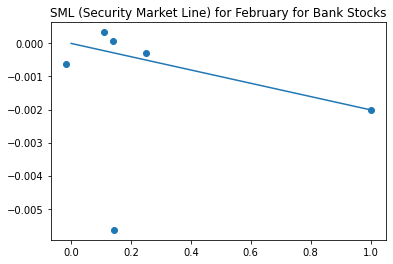

In [71]:
#2.)

def get_SML(stocks, sector):

  if SP500 not in stocks:
    stocks.append(SP500)

  january_expected_returns = pd.DataFrame()
  january_betas = pd.DataFrame()

  for stock in stocks[:-1]:
    january_expected_returns[stock] = all_expected_returns_df[stock].iloc[0: 20]
    january_betas[stock] = [january_expected_returns[stock].cov(all_expected_returns_df[SP500])]/all_expected_returns_df[SP500].var()

  print("Expected Daily Returns for " + sector + " Stocks for January:")
  display(january_expected_returns)
  print("\n")
  print("β values for " + sector + " Stocks for the month of January:")
  display(january_betas)
  print("\n")

  january_betas[SP500] = 1
  february_average_returns = pd.DataFrame()

  for stock in stocks:
    february_average_returns[stock] = [all_expected_returns_df[stock].iloc[20: 39].mean()]

  print("Average Daily Returns for " + sector + " Stocks and S&P500 for February:")
  display(february_average_returns)
  print("\n")

  plt.figure()
  plt.scatter(january_betas, february_average_returns)
  plt.plot(np.array([0, 1], dtype = object), np.array([0, february_average_returns[SP500]], dtype = object))
  plt.title("SML (Security Market Line) for February for " + sector +" Stocks")
  plt.show()

get_SML(combined_stocks, "All")
print("\n")
get_SML(tech_stocks, "Tech")
print("\n")
get_SML(bank_stocks, "Bank")

Annual Closing Prices:
All Stocks: 0.9976465817032426
Tech Stocks: 1.0072933109640383
Bank Stocks: 0.9928828114540359
S&P 500: 0.9161654127587748




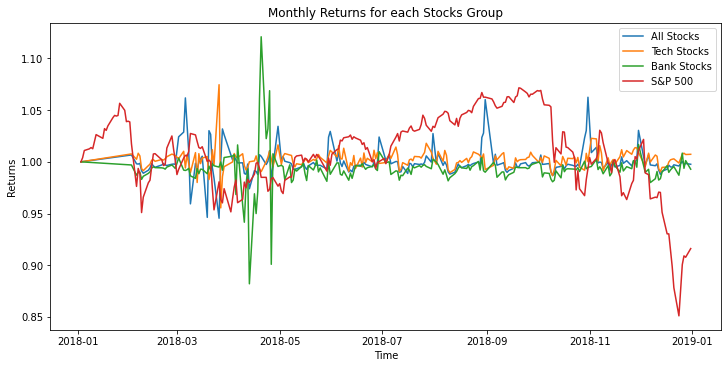

In [72]:
#3.)

def get_MP(stocks):

  returns = pd.DataFrame(columns = ['day', 'amount'])
  returns = returns.append({'day':all_expected_returns_df.index[0], 'amount': 1}, ignore_index = True)

  for i in range(1, 12):
    month = str(i)
    if i < 10:
      month = '0' + month

    ones = np.ones(len(stocks))
    mean = all_expected_returns_df[stocks]['2018-'+ month : '2018-'+ month].mean()
    cov = all_expected_returns_df[stocks]['2018-'+ month : '2018-'+ month].cov()
    cov_inv = np.linalg.inv(cov)

    w_MP_s = 1/(ones @ cov_inv @ mean)
    w_MP = w_MP_s * cov_inv @ mean

    next_month = str(i + 1)
    if i < 9:
      next_month = '0' + next_month

    portfolio = pd.DataFrame()
    for i, stock in enumerate(stocks):
      portfolio[stock] = w_MP[i] * all_expected_returns_df[stock]['2018-'+ next_month : '2018-'+ next_month]
        
    monthly_expected_returns = portfolio.mean(1)

    for i in range(1, len(monthly_expected_returns)):
      returns = returns.append({'day':monthly_expected_returns.index[i], 'amount': returns['amount'][i - 1] + monthly_expected_returns[i]}, ignore_index = True)
    
  return returns

SP500_returns = pd.DataFrame(columns = ['day', 'amount'])
SP500_returns = SP500_returns.append({'day':all_expected_returns_df.index[0], 'amount': 1}, ignore_index = True)

for j in range(1, len(all_expected_returns_df[SP500])):
  SP500_returns = SP500_returns.append({'day':all_expected_returns_df.index[j], 'amount': SP500_returns['amount'][j - 1] + all_expected_returns_df[SP500][j]}, ignore_index = True)

all_returns = get_MP(combined_stocks)
tech_returns = get_MP(tech_stocks)
bank_returns = get_MP(bank_stocks)

print("Annual Closing Prices:")
print("All Stocks: " + str(all_returns['amount'].tail(1).values[0]))
print("Tech Stocks: " + str(tech_returns['amount'].tail(1).values[0]))
print("Bank Stocks: " + str(bank_returns['amount'].tail(1).values[0]))
print("S&P 500: " + str(SP500_returns['amount'].tail(1).values[0]))
print("\n")

fig, ax = plt.subplots(1, 1, constrained_layout = True, figsize = (10, 5))
ax.plot(all_returns['day'], all_returns['amount'])
ax.plot(tech_returns['day'], tech_returns['amount'])
ax.plot(bank_returns['day'], bank_returns['amount'])
ax.plot(SP500_returns['day'], SP500_returns['amount'])
ax.set_title("Monthly Returns for each Stocks Group")
ax.set_xlabel("Time")
ax.set_ylabel("Returns")
ax.legend(["All Stocks", "Tech Stocks", "Bank Stocks", "S&P 500"])

fig.show()